# import

In [ ]:
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, FixedLocator
import pandas as pd
import seaborn as sns

# データの読み込み

In [11]:
folder_path = '/Users/yf/Documents/大学院関連/論文系統/論文書く(論文投稿)/25年jams_YouTuberの評価モデル/データ'

df = pd.read_excel(f"{folder_path}/【結果】5つの指標.xlsx", sheet_name="raw")

# 変換
df.loc[:, "平均コメント数"] = df["平均コメント数"].astype(float)
df.loc[:, "ネガティブコメントの割合"] = df["ネガティブコメントの割合"].astype(float)

df.head()

,チャンネル名,登録者数,平均再生回数,平均高評価数,平均コメント数,ネガティブコメントの割合
0,【 深掘りTV 】 生活改善・パソコン・ ガジェット,87900,82570.811224,887.647959,35.270408,0.222083
1,Apple Life - あっくんガジェットチャンネル,17000,17987.525822,128.680751,15.830986,0.257753
2,Apple Watch Channel,52100,58363.300000,475.900000,46.587500,0.147786
3,basara669_VLOG,38300,19066.932099,237.358025,19.520576,0.169972
4,BSえーこりん / BS Ekorin,13000,1255.386000,54.398000,13.594000,0.163299


# 事前確認 （"横軸：チャンネル登録者数／縦軸：それ以外の各指標"の散布図）

In [19]:
# 散布図を描画する関数（subplot対応）
def making_scatter_subplot(ax, x, y, xlabel, ylabel, xlim_min, xlim_max, ylim_min, ylim_max, is_fraction=False, yticks_step=None):
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.scatter(x, y, color='k', alpha=0.7, edgecolors='k')
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)

    # 指定された間隔でy軸の目盛りを設定
    if yticks_step is not None:
        ax.set_yticks(np.arange(ylim_min, ylim_max + yticks_step, yticks_step))
    
    # Y軸のフォーマット設定（差分のみ小数表示）
    if is_fraction:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))  # 小数第1位まで表示
    else:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # 整数カンマ区切り

    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # X軸もカンマ区切り

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

    # Y軸メモリのフォントサイズを大きくし、太字にする
    ax.tick_params(axis='y', labelsize=16, width=2)  # フォントサイズ大きめ & 軸の太さ調整
    plt.setp(ax.get_yticklabels(), fontweight="bold")  # Y軸目盛りのフォントを太字に

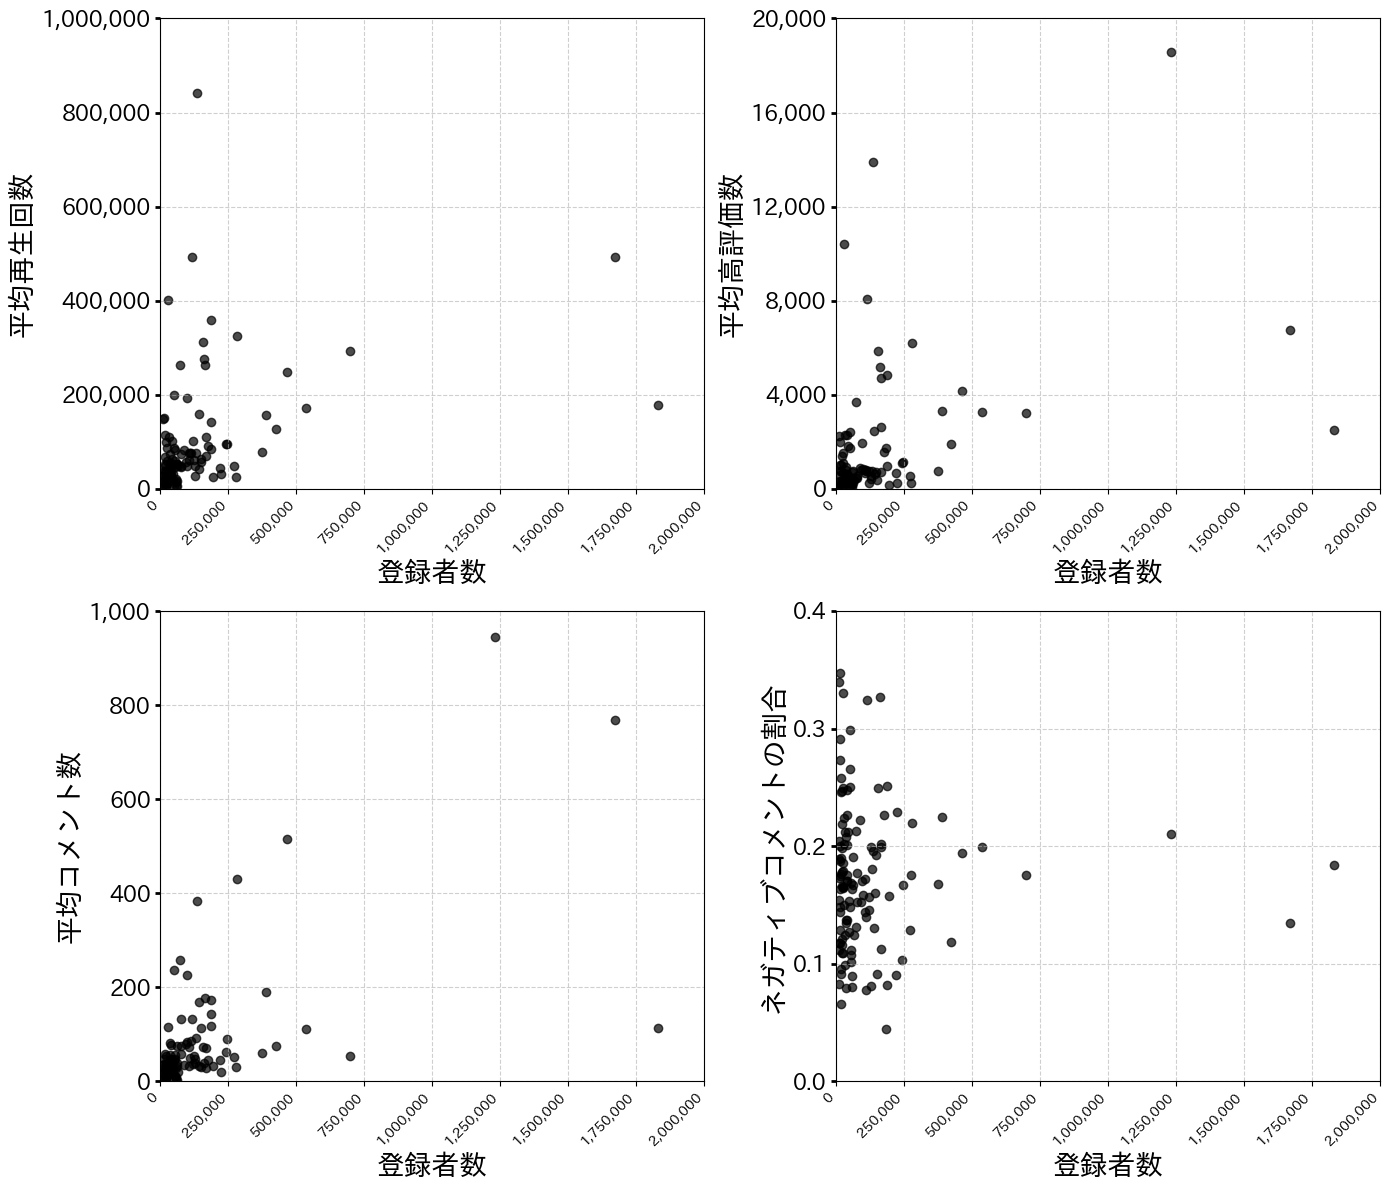

In [20]:
# 図の準備
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2×2 のサブプロットをコンパクトに

x = "登録者数"
# y_labels = ["平均再生回数", "平均コメント数", "平均高評価数", "ポジティブなコメントの割合と\n ネガティブなコメントの割合の差"]  # 右下のラベルを短縮
y_labels = ["平均再生回数", "平均高評価数", "平均コメント数", "ネガティブコメントの割合"]
y_limits = [(0, 900000), (0, 20000), (0, 1000), (0, 0.35)]  # それぞれのy軸の範囲
yticks_steps = [200000, 4000, None, 0.1]  # 右上（平均高評価数）を2000刻みに変更

# 2×2の散布図を作成
for i, (ax, y, ylim, yticks_step) in enumerate(zip(axes.flatten(), y_labels, y_limits, yticks_steps)):
    is_fraction = (i == 3)  # 右下のみ小数フォーマット適用
    making_scatter_subplot(ax, df[x], df[y], xlabel=x, ylabel=y,
                           xlim_min=0, xlim_max=2000000, ylim_min=ylim[0], ylim_max=ylim[1], 
                           is_fraction=is_fraction, yticks_step=yticks_step)

# レイアウト調整
plt.tight_layout()
plt.show()

# 図1の作成

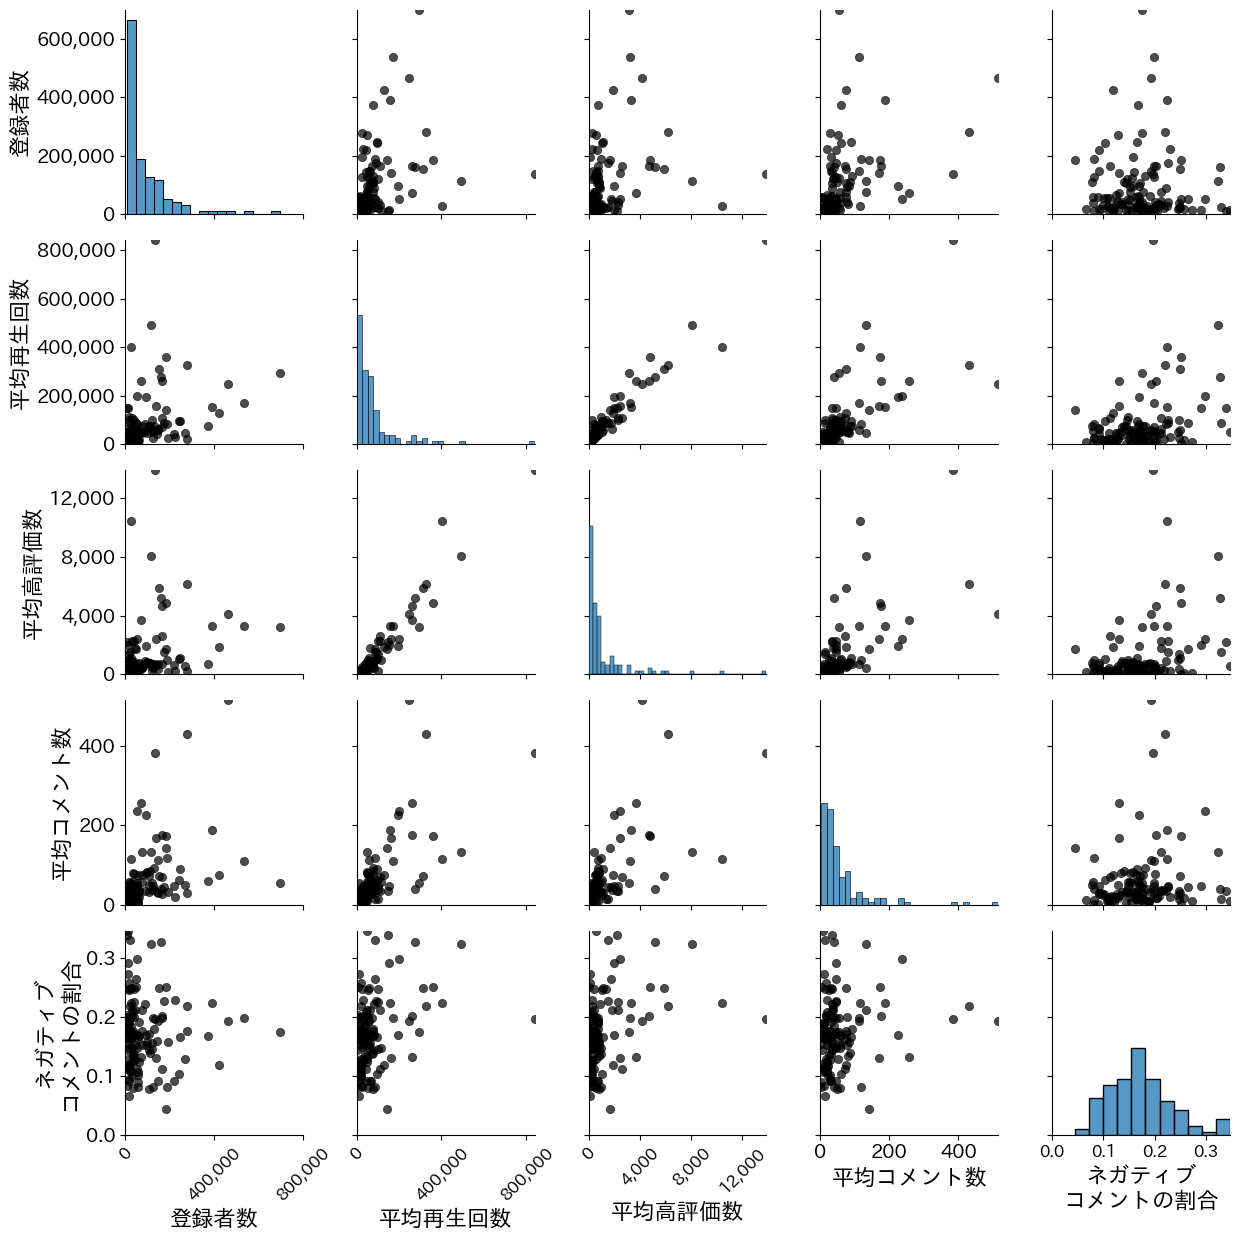

In [ ]:
# 登録者数100万未満のYoutuberを分析の対象とする
under_million = df[df["登録者数"] < 1000000]

# チャンネル名を除外
numeric_cols = under_million[['登録者数', '平均再生回数', '平均高評価数', '平均コメント数', 'ネガティブコメントの割合']]

# ペアプロットの作成
g = sns.pairplot(numeric_cols, plot_kws={'alpha': 0.7, 'edgecolor': 'k', 'color': 'k'})  # 黒塗り

# y軸のカスタマイズ
for i, ax in enumerate(g.axes.flatten()):
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()

        # X軸のラベルフォーマット設定
        if xlabel == "登録者数":
            ax.set_xticks(ax.get_xticks())  # 目盛り位置を固定
            max_value = numeric_cols["登録者数"].max()
            ax.set_xlim(0, max_value)
            ax.set_xticks(np.arange(0, 1000000, 400000))
            ax.set_xlabel(xlabel, fontsize=16, fontweight="bold")
            ax.set_xticklabels(ax.get_xticks(), rotation=45, fontweight='bold', fontsize=12)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

        elif xlabel == "平均再生回数":
            ax.set_xticks(ax.get_xticks())  # 目盛り位置を固定
            max_value = numeric_cols["平均再生回数"].max()
            ax.set_xlim(0, max_value)
            ax.set_xticks(np.arange(0, 1000000, 400000))
            ax.set_xlabel(xlabel, fontsize=16, fontweight="bold")
            ax.set_xticklabels(ax.get_xticks(), rotation=45, fontweight='bold', fontsize=12)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
        
        elif xlabel == "平均高評価数":
            ax.set_xticks(ax.get_xticks())  # 目盛り位置を固定
            max_value = numeric_cols["平均高評価数"].max()
            ax.set_xlim(0, max_value)
            ax.set_xticks(np.arange(0, 14000, 4000))
            ax.set_xlabel(xlabel, fontsize=16, fontweight="bold")
            ax.set_xticklabels(ax.get_xticks(), rotation=45, fontweight='bold', fontsize=12)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
        
        elif xlabel == "平均コメント数":
            ax.set_xticks(ax.get_xticks())  # 目盛り位置を固定
            max_value = numeric_cols["平均コメント数"].max()
            ax.set_xlim(0, max_value)
            ax.xaxis.set_major_locator(FixedLocator(np.arange(0, 600, 200)))
            ax.set_xlabel(xlabel, fontsize=16, fontweight="bold")
            ax.set_xticklabels(ax.get_xticks(), fontweight='bold', fontsize=14)
        
        # "ネガティブコメントの割合" の X軸ラベルを折り返し可能にする
        elif xlabel == "ネガティブコメントの割合":
            ax.set_xticks(ax.get_xticks())  # 目盛り位置を固定
            max_value = numeric_cols["ネガティブコメントの割合"].max()
            ax.set_xlim(0, max_value)
            ax.xaxis.set_major_locator(FixedLocator(np.arange(0, 0.4, 0.1)))
            ax.set_xlabel("ネガティブ\nコメントの割合", fontsize=16, fontweight="bold", wrap=True)
            ax.set_xticklabels(ax.get_xticks(), fontweight='bold', fontsize=12)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # 小数第1位まで
        
    # Y軸に関して --------------------------------------------------------------------------------------------------------------------------------
        
        # "登録者数"のY軸（1行目） → 200,000刻み & 3桁区切り
        if ylabel == "登録者数":
            ax.set_yticks(ax.get_yticks())  # 目盛り位置を固定
            max_value = numeric_cols["登録者数"].max()
            ax.set_ylim(0, max_value)
            ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1000000, 200000)))
            ax.set_ylabel(ylabel, fontsize=16, fontweight="bold")
            ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=14)
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

        # "平均再生回数"のY軸（2行目） → 3桁区切り
        elif ylabel == "平均再生回数":
            ax.set_yticks(ax.get_yticks())  # 目盛り位置を固定
            max_value = numeric_cols["平均再生回数"].max()
            ax.set_ylim(0, max_value)
            ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1000000, 200000)))
            ax.set_ylabel(ylabel, fontsize=16, fontweight="bold")
            ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=14)
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
        
        # "平均高評価数"のY軸（3行目） → 2,000刻み & 3桁区切り
        elif ylabel == "平均高評価数":
            ax.set_yticks(ax.get_yticks())  # 目盛り位置を固定
            max_value = numeric_cols["平均高評価数"].max()
            ax.set_ylim(0, max_value)
            ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 16000, 4000)))
            ax.set_ylabel(ylabel, fontsize=16, fontweight="bold")
            ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=14)
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
        
        # "平均コメント数" の Y軸 → 整数フォーマットに変更
        elif ylabel == "平均コメント数":
            max_value = numeric_cols["平均コメント数"].max()
            ax.set_ylim(0, max_value)
            ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 600, 200)))
            ax.set_ylabel(ylabel, fontsize=16, fontweight="bold")
            ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=14)
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # 小数点以下を削除
        
        # "ネガティブコメントの割合"のY軸（5行目） → 0.1刻み
        elif ylabel == "ネガティブコメントの割合":            
            ax.set_yticks(ax.get_yticks())  # 目盛り位置を固定
            max_value = numeric_cols["ネガティブコメントの割合"].max()
            ax.set_ylim(0, max_value)
            ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 0.5, 0.1)))
            ax.set_ylabel("ネガティブ\nコメントの割合", fontsize=16, fontweight="bold", wrap=True)
            ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=14)
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # 小数第1位まで
    
    # Y軸に関して --------------------------------------------------------------------------------------------------------------------------------

# レイアウト調整
plt.tight_layout()
plt.show()